<a href="https://www.kaggle.com/code/abhineetsahay/placement-model?scriptVersionId=243929581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df=pd.read_csv("/kaggle/input/college-placement/placement-dataset.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
print("shape of data", df.shape)

shape of data (100, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [7]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


## Scatter plot cgpa and iq 

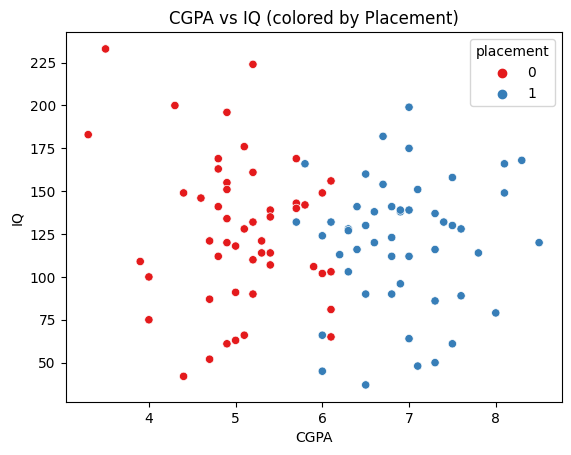

In [8]:
sn.scatterplot(data=df, x='cgpa', y='iq', hue='placement', palette='Set1')

plt.title('CGPA vs IQ (colored by Placement)')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [9]:
from scipy.stats import shapiro
def testNormality(data,column):
    stat, p = shapiro(df[column])
    print('Shapiro-Wilk Test p-value:', p)
    if p > 0.05:
        print("Data is likely normal (fail to reject H0)")
    else:
        print("Data is likely not normal (reject H0)")

Shapiro-Wilk Test p-value: 0.3173403747243444
Data is likely normal (fail to reject H0)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


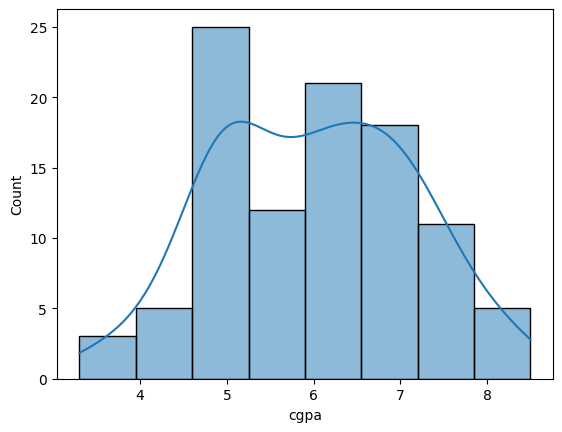

In [10]:
sn.histplot(data=df,x='cgpa',kde=True)
testNormality(df,'cgpa')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Shapiro-Wilk Test p-value: 0.3173403747243444
Data is likely normal (fail to reject H0)


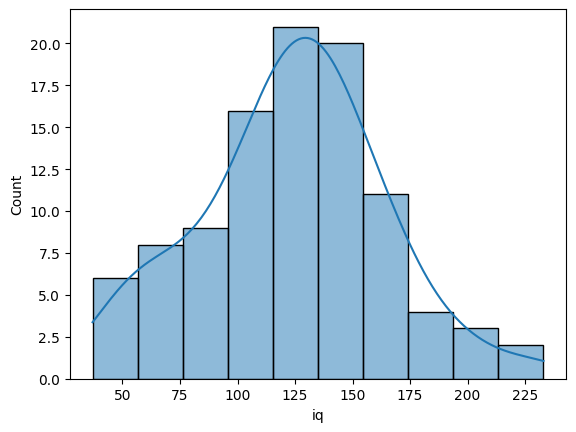

In [11]:
sn.histplot(data=df,x='iq',kde=True)
testNormality(df,'cgpa')

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

# Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [14]:
X_train

,cgpa,iq
35,6.8,90.0
11,6.9,138.0
84,5.7,169.0
44,7.5,61.0
73,4.9,61.0
...,...,...
43,6.8,141.0
22,4.9,120.0
72,7.3,116.0
15,5.1,176.0


# Scaling down the values

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [17]:
clf.fit(X_train,y_train)


LogisticRegression()

In [18]:
y_pred=clf.predict(X_test)

# Accuacy Score of 90%

In [19]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print("Accuracy of the model ",accuracy_score(y_test,y_pred))
print("Classification of the model")
print(classification_report(y_test,y_pred))
print("Confustion of the matrix of the model",confusion_matrix(y_test,y_pred))

Accuracy of the model  0.9
Classification of the model
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confustion of the matrix of the model [[ 8  1]
 [ 1 10]]
